In [2]:
%matplotlib inline

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/housing.db")

housing = pd.read_sql_query(
    """
    SELECT
        b.longitude,
        b.latitude,
        s.housing_median_age,
        s.total_rooms,
        s.total_bedrooms,
        s.population,
        s.households,
        s.median_income,
        op.name AS ocean_proximity,
        pc.label AS price_class
    FROM block b
    JOIN block_housing_stats s
        ON s.block_id = b.block_id
    JOIN ocean_proximity op
        ON op.ocean_proximity_id = b.ocean_proximity_id
    JOIN price_class pc
        ON pc.price_class_id = s.price_class_id
    """,
    conn
)

conn.close()

housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                52.0         1627           280.0   

   population  households  median_income ocean_proximity price_class  
0         322         126         8.3252        NEAR BAY        HIGH  
1        2401        1138         8.3014        NEAR BAY        HIGH  
2         496         177         7.2574        NEAR BAY        HIGH  
3         558         219         5.6431        NEAR BAY        HIGH  
4         565         259         3.8462        NEAR BAY        HIGH

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    housing,
    title="California Housing Classification Profiling Report",
    explorative=True
)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 711.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

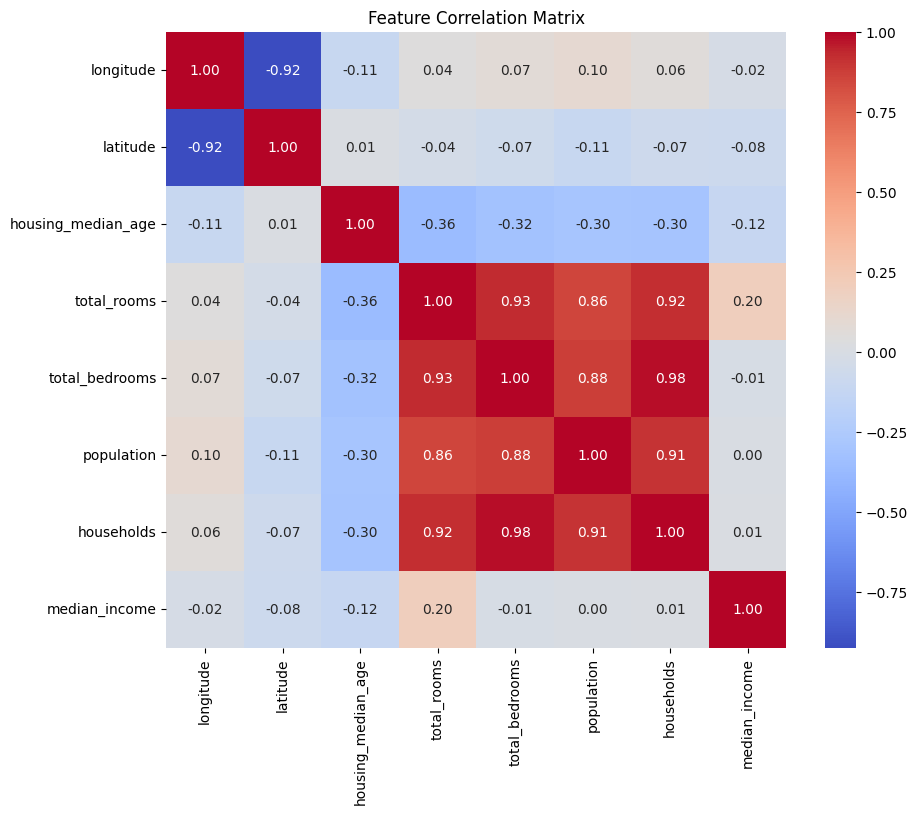

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    housing.drop(columns=["price_class"]).corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()